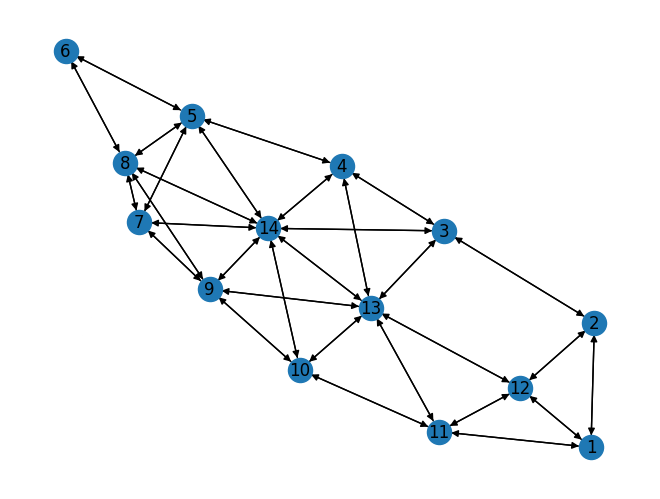

In [45]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


def create_graph():
    G = nx.DiGraph()
    edges = [
        (1, 12), (12, 1), (1, 11), (11, 1), (1, 2), (2, 1),
        (2, 12), (12, 2), (2, 3), (3, 2),
        (3, 13), (13, 3), (3, 4), (4, 3), (3, 14), (14, 3),
        (4, 14), (14, 4), (4, 5), (5, 4), (4, 13), (13, 4),
        (5, 6), (6, 5), (5, 7), (7, 5), (5, 14), (14, 5), (5, 8), (8, 5),
        (6, 8), (8, 6),
        (7, 14), (14, 7), (7, 8), (8, 7), (7, 9), (9, 7),
        (8, 9), (9, 8), (8, 14), (14, 8),
        (9, 10), (10, 9), (9, 14), (14, 9), (9, 13), (13, 9),
        (10, 13), (13, 10), (10, 14), (14, 10), (10, 11), (11, 10),
        (11, 12), (12, 11), (11, 13), (13, 11), (12, 13), (13, 12), (13, 14), (14, 13)
    ]
    G.add_edges_from(edges)
    return G

G = create_graph()
nx.draw(G, with_labels=True)


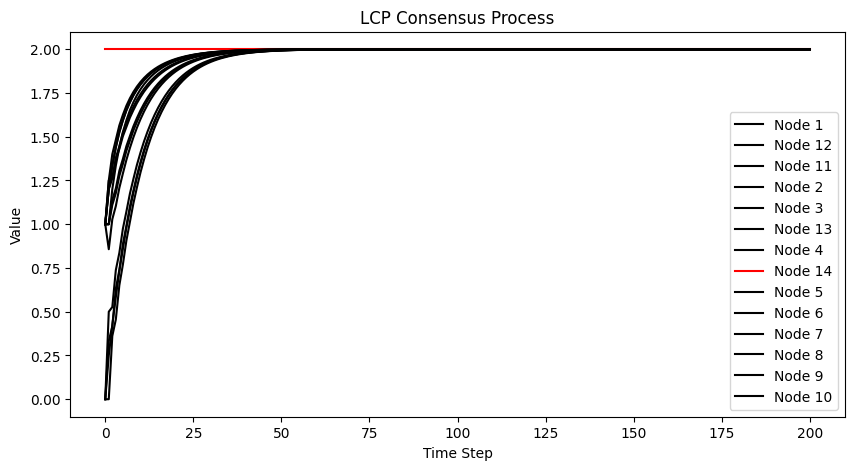

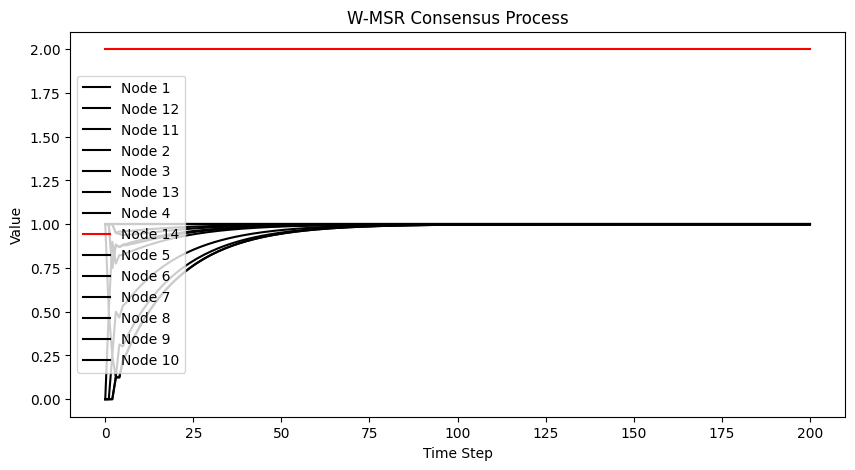

In [46]:

# 初始化节点状态
def initialize_values(G):
    values = {1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 
              9: 1, 10: 1, 11: 0, 12: 0, 13: 1, 14: 2}  
    return values

# LCP 
def lcp_update(G, values, malicious_nodes, steps=10):
    values_history = [values.copy()]
    for _ in range(steps):
        new_values = values.copy()
        for node in G.nodes:
            if node in malicious_nodes:
                continue  
            neighbors = list(G.neighbors(node))
            new_values[node] = np.mean([values[n] for n in neighbors])
        values = new_values
        values_history.append(values.copy())
    return values_history

# W-MSR 
def wmsr_update(G, values, malicious_nodes, steps=10, f=1):
    values_history = [values.copy()]
    for _ in range(steps):
        new_values = values.copy()
        for node in G.nodes:
            if node in malicious_nodes:
                continue  
            neighbors = list(G.neighbors(node))
            neighbor_values = sorted([values[n] for n in neighbors])
            x = values[node]
            larger_value = [v for v in neighbor_values if v > x]
            smaller_value = [v for v in neighbor_values if v < x]
            if len(larger_value) > f:
                filtered_value = neighbor_values[: len(neighbor_values) - f]
            else: filtered_value = smaller_value
            if len(smaller_value) > f:
                filtered_value = filtered_value[f:]
            else: filtered_value = [v for v in filtered_value if v > x]
            filtered_value.append(x)
            new_values[node] = np.mean(filtered_value)
        values = new_values
        values_history.append(values.copy())
    return values_history


def plot_results(G, values_history, title, malicious_nodes):
    plt.figure(figsize=(10, 5))
    for node in G.nodes:
        color = 'red' if node in malicious_nodes else 'black'
        plt.plot([values[node] for values in values_history], label=f'Node {node}', color=color)
    plt.xlabel("Time Step")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.show()

# run
G = create_graph()
values = initialize_values(G)
malicious_nodes = {14}  


lcp_results = lcp_update(G, values, malicious_nodes, steps=200)
plot_results(G, lcp_results, "LCP Consensus Process", malicious_nodes)


wmsr_results = wmsr_update(G, values, malicious_nodes, steps=200)
plot_results(G, wmsr_results, "W-MSR Consensus Process", malicious_nodes)


In [47]:
import random

def time_varying_graph(G, t):
    if t % 10 != 0:
        edges = list(G.edges())
        for edge in edges:
            if random.random() < 0.5:
                G.remove_edge(*edge)
    return G

In [48]:
def lcp_update(G, values, malicious_nodes, steps=10):
    values_history = [values.copy()]
    for t in range(steps):
        G = create_graph()
        G = time_varying_graph(G, t)

        new_values = values.copy()
        for node in G.nodes:
            if node in malicious_nodes:
                continue  
            neighbors = list(G.neighbors(node)) 
            neighbors.append(node)
            new_values[node] = np.mean([values[n] for n in neighbors])
        values = new_values
        values_history.append(values.copy())
    return values_history

# W-MSR 
def wmsr_update(G, values, malicious_nodes, steps=10, f=1):
    values_history = [values.copy()]
    for t in range(steps):
        G = create_graph()
        G = time_varying_graph(G, t)

        new_values = values.copy()
        for node in G.nodes:
            if node in malicious_nodes:
                continue  
            neighbors = list(G.neighbors(node))
            neighbor_values = sorted([values[n] for n in neighbors])
            x = values[node]
            larger_value = [v for v in neighbor_values if v > x]
            smaller_value = [v for v in neighbor_values if v < x]
            if len(larger_value) > f:
                filtered_value = neighbor_values[: len(neighbor_values) - f]
            else: filtered_value = smaller_value
            if len(smaller_value) > f:
                filtered_value = filtered_value[f:]
            else: filtered_value = [v for v in filtered_value if v > x]
            filtered_value.append(x)
            new_values[node] = np.mean(filtered_value)
        values = new_values
        values_history.append(values.copy())
    return values_history

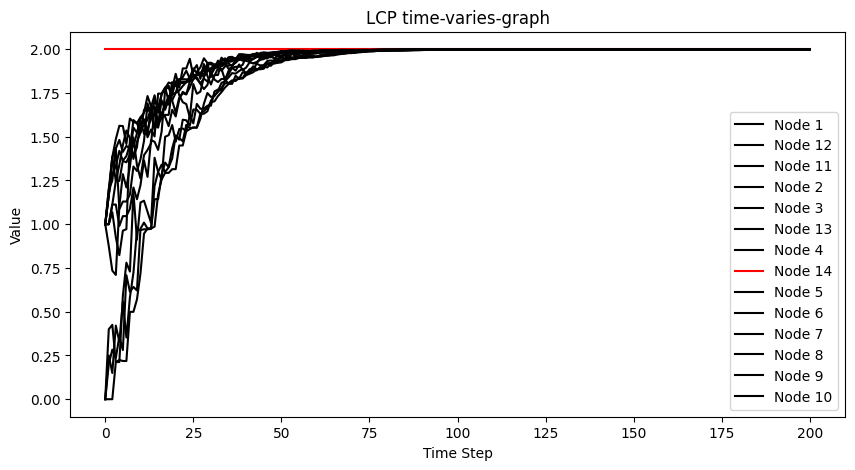

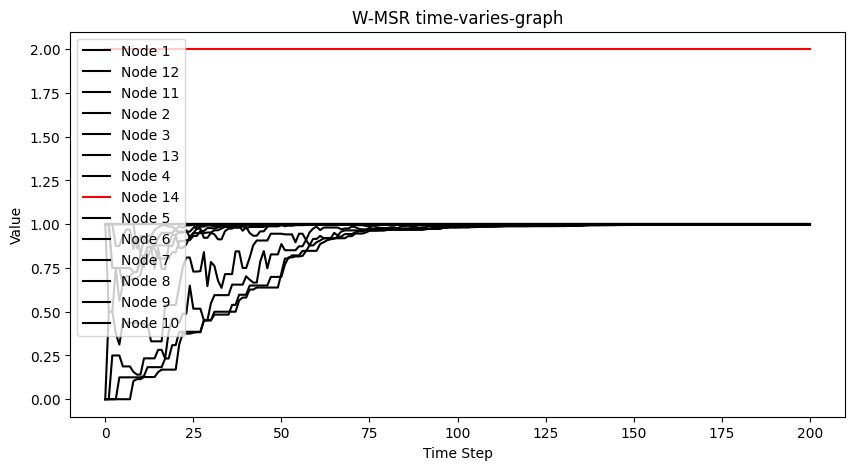

In [50]:
G = create_graph()
values = initialize_values(G)
malicious_nodes = {14}  


lcp_results = lcp_update(G, values, malicious_nodes, steps=200)
plot_results(G, lcp_results, "LCP time-varies-graph", malicious_nodes)


wmsr_results = wmsr_update(G, values, malicious_nodes, steps=200)
plot_results(G, wmsr_results, "W-MSR time-varies-graph", malicious_nodes)